# **Fase inicial: Preprocesamiento de los datos**
---
### Fusión todos los archivos con extension .pcap del conjunto de datos CTU-13:  

Con el fin de realizar diversos análisis, se optó por transformar los archivos del conjunto CTU-13 a formato de dataframe, posteriormente, además de fusionarlos en un solo archivo con formato dataframe de la librería pandas.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_path = './CTU-13_data' #Ruta de la carpeta con archivos .pcap correspondientes

data_file_names = [file for file in os.listdir(data_path)] # Lectura de los nombres de los archivos del directorio
#print(data_file_names)  # Lista de strings que contiene el nombre de los archivos .parquet

### Iteramos sobre los archivos que estan en la ruta especificada en ``` data_path = './CTU-13_data' ``` donde se hace la lectura de los archivos de .pcap para convertirlos a .csv.

In [2]:
# Diccionario que contendra los dataframes despues de hacer el cast de parquet a pandas df
data_frames = {}
'''
Iteramos sobre la lista de nombres para añadirlos al diccionario de dataframes

Ejemplo del formato del diccionario seria: 

    {'1-Neris-20110810.binetflow.parquet': pd.DataFrame('./CTU-13_data/1-Neris-20110810.binetflow.parquet')}

'''
for file in data_file_names:
    data_frames[file] = pd.read_parquet(f'{data_path}/{file}') 

### Ahora fusionamos todos los datasets

In [3]:
all_data = pd.concat([ data_frames[file] for file in data_file_names ])
print(all_data.head())
print(all_data.shape)
print(all_data.columns)

        dur proto    dir state  stos  dtos  tot_pkts  tot_bytes  src_bytes  \
0  1.026539   tcp     ->  S_RA   0.0   0.0         4        276        156   
1  1.009595   tcp     ->  S_RA   0.0   0.0         4        276        156   
2  3.056586   tcp     ->  SR_A   0.0   0.0         3        182        122   
3  3.111769   tcp     ->  SR_A   0.0   0.0         3        182        122   
4  3.083411   tcp     ->  SR_A   0.0   0.0         3        182        122   

                                    label                  Family  
0  flow=Background-Established-cmpgw-CVUT  20110810.binetflow.csv  
1  flow=Background-Established-cmpgw-CVUT  20110810.binetflow.csv  
2             flow=Background-TCP-Attempt  20110810.binetflow.csv  
3             flow=Background-TCP-Attempt  20110810.binetflow.csv  
4             flow=Background-TCP-Attempt  20110810.binetflow.csv  
(10598771, 11)
Index(['dur', 'proto', 'dir', 'state', 'stos', 'dtos', 'tot_pkts', 'tot_bytes',
       'src_bytes', 'label',

In [4]:
#Visualizar una muestra del contenido de los registros:
all_data.sample(10)


,dur,proto,dir,state,stos,dtos,tot_pkts,tot_bytes,src_bytes,label,Family
419282,0.005486,tcp,->,SA_RA,0.0,0.0,2,122,62,flow=Background-TCP-Established,20110816
304608,2.626421,udp,<->,CON,0.0,0.0,8,883,613,flow=Background-UDP-Established,20110817.binetflow.csv
177024,16.251558,tcp,->,FSA_FSA,0.0,0.0,6,372,246,flow=Background-TCP-Established,20110816.binetflow.csv
238728,0.017371,udp,<->,CON,0.0,0.0,2,437,81,flow=To-Background-UDP-CVUT-DNS-Server,20110816
125832,0.010455,udp,<->,CON,0.0,0.0,2,573,80,flow=To-Background-UDP-CVUT-DNS-Server,20110818.binetflow.csv
769632,0.061980,udp,<->,CON,0.0,0.0,2,307,74,flow=From-Botnet-V42-UDP-DNS,20110810.binetflow.csv
1540432,0.023316,udp,<->,CON,0.0,0.0,2,132,72,flow=Background-Established-cmpgw-CVUT,20110810.binetflow.csv
1786526,0.163940,udp,<->,CON,0.0,0.0,2,522,462,flow=Background-UDP-Established,20110812.binetflow.csv
38079,69.011063,tcp,->,SRA_FSPA,0.0,0.0,8,956,338,flow=Background-TCP-Established,20110815.binetflow.csv
570799,345.187012,tcp,->,FSPA_FSPA,0.0,0.0,197,188966,6065,flow=Background-Established-cmpgw-CVUT,20110815.binetflow.csv


Las columnas "label" y "family" serán modificadas para su personalización.

1. Análisis de la columna *label*:  
- Se observa que la columna posee una etiqueta de flow, donde indica el tipo de conexipon solicitada/establecida, o bien, el registro de la presencia de un Botnet.  
- Se propone el método de etiquetado 0 == normal, 1 == ataque (presencia de botnets)


In [5]:
#Visualizacion de las columnas con registro de Botnet:
print("Registros que corresponden a ataques:")
print(all_data[all_data['label'].str.contains('Botnet')].shape[0])
print("Registros que corresponden a tráfico normal:")
print(all_data[all_data['label'].str.contains('Botnet') == False].shape[0])

Registros que corresponden a ataques:
262573
Registros que corresponden a tráfico normal:
10336198


In [6]:
dfmod = all_data #Crear una copia del dataframe original para su modificacion
# Crear una nueva columna evaluando si "botnet" está en la columna "label"
dfmod["is_botnet"] = dfmod["label"].astype(str).apply(lambda x: 1 if "botnet" in x.lower() else 0)
dfmod.sample(18, random_state=432)

,dur,proto,dir,state,stos,dtos,tot_pkts,tot_bytes,src_bytes,label,Family,is_botnet
425570,0.001110,udp,<->,CON,0.0,0.0,2,618,75,flow=Background-UDP-Established,20110810.binetflow.csv,0
32523,0.000655,udp,->,INT,0.0,NaN,1,107,107,flow=Background-UDP-Attempt,20110815.binetflow.csv,0
1187347,264.363129,tcp,->,SRPA_SPA,0.0,0.0,54,6301,3301,flow=Background-TCP-Established,20110812.binetflow.csv,0
658905,0.135019,udp,<->,CON,0.0,0.0,2,313,64,flow=Background-UDP-Established,20110818.binetflow.csv,0
689170,0.000452,udp,<->,CON,0.0,0.0,2,234,86,flow=To-Background-UDP-CVUT-DNS-Server,20110815.binetflow.csv,0
71394,0.029950,udp,<->,CON,0.0,0.0,2,158,71,flow=Background-UDP-Established,20110818.binetflow.csv,0
1092222,0.135506,tcp,->,FSPA_FSPA,0.0,0.0,33,25654,853,flow=Background-TCP-Established,20110816,0
1256117,1531.330200,udp,<->,CON,0.0,0.0,10,1858,344,flow=Background-UDP-Established,20110810.binetflow.csv,0
1015277,9.032158,tcp,->,S_,0.0,NaN,3,186,186,flow=From-Botnet-V43-TCP-Attempt-SPAM,20110811.binetflow.csv,1
635089,0.004251,tcp,->,FSPA_FSPA,0.0,0.0,10,1343,810,flow=Background-TCP-Established,20110815.binetflow.csv,0


In [ ]:
print(dfmod['label'].unique())

['flow=Background-Established-cmpgw-CVUT' 'flow=Background-TCP-Attempt'
 'flow=Background-TCP-Established' ...
 'flow=From-Botnet-V50-6-TCP-HTTP-Google-Net-Established-2'
 'flow=From-Botnet-V50-4-TCP-HTTP-Not-Encrypted-Down-2'
 'flow=From-Botnet-V50-1-TCP-Established-SSL-To-Microsoft-1']


C:\Users\soulg\AppData\Local\Temp\ipykernel_8752\1251447960.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=dfmod['proto'], order=dfmod['proto'].value_counts().index, palette="viridis")


<Figure size 1200x600 with 0 Axes>

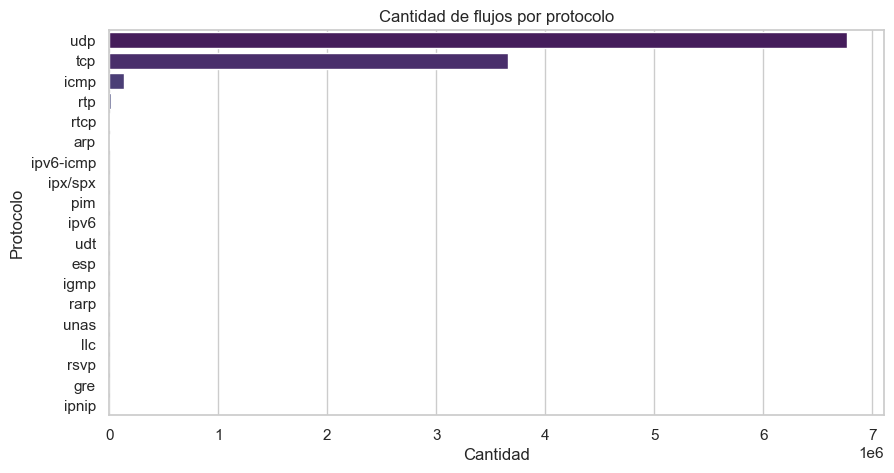

In [11]:
# Ajustar el tamaño de los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
# 2. Conteo de protocolos (proto)
plt.figure(figsize=(10, 5))
sns.countplot(y=dfmod['proto'], order=dfmod['proto'].value_counts().index, palette="viridis")
plt.title("Cantidad de flujos por protocolo")
plt.xlabel("Cantidad")
plt.ylabel("Protocolo")
plt.show()

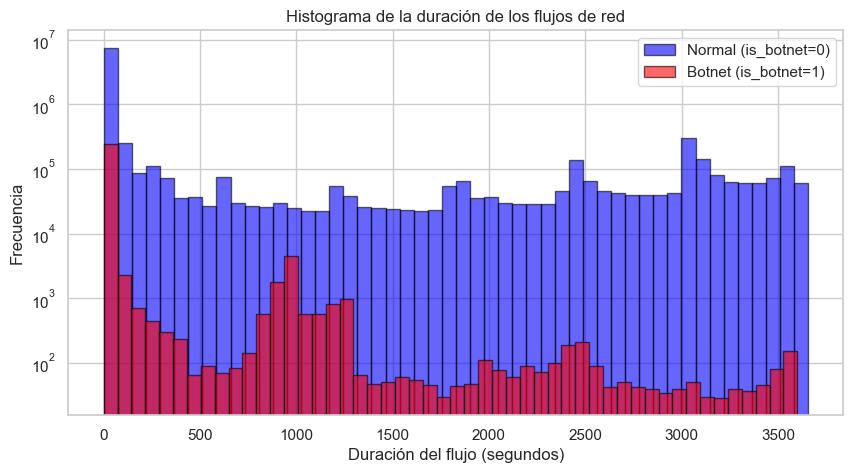

In [ ]:
dfmod_botnet = dfmod[dfmod["is_botnet"] == 1]
dfmod_normal = dfmod[dfmod["is_botnet"] == 0]

# Crear histograma
plt.figure(figsize=(10, 5))
plt.hist(dfmod_normal["dur"], bins=50, alpha=0.6, label="Normal (is_botnet=0)", color="blue", edgecolor='black')
plt.hist(dfmod_botnet["dur"], bins=50, alpha=0.6, label="Botnet (is_botnet=1)", color="red", edgecolor='black')

# Configuraciones del gráfico
plt.xlabel("Duración del flujo (segundos)")
plt.ylabel("Frecuencia")
plt.title("Histograma de la duración de los flujos de red")
plt.legend()
plt.yscale("log")  # Escala logarítmica para mejor visualización si hay valores extremos holamundo
plt.grid(True)

# Mostrar gráfico
plt.show()

# Observaciones:
---

# 1. La mayoría de los flujos tienen duraciones cortas

- Hay un pico grande en duraciones cercanas a 0 segundos tanto para tráfico normal como botnet.
- Esto sugiere que muchas conexiones de red son de corta duración, lo cual es común en comunicaciones UDP o intentos de conexión fallidos.

# 2. Los flujos de botnet tienden a estar más concentrados en duraciones cortas

- Se observa una mayor proporción de tráfico botnet en los primeros 1000 segundos en comparación con el tráfico normal.
- Esto indica que los ataques o comunicaciones automatizadas de botnets suelen ocurrir en intervalos más breves.

# 3. El tráfico normal está distribuido en una mayor variedad de duraciones

- Aunque hay más tráfico normal en todo el rango de duraciones, su distribución es más uniforme a lo largo del tiempo.
- Esto puede indicar que las conexiones legítimas incluyen tanto comunicaciones rápidas como flujos prolongados.

# 4. Patrones de tráfico botnet en duraciones largas

- Aunque el tráfico botnet es predominante en duraciones cortas, sigue presente en flujos largos.
- Esto puede indicar que algunas botnets establecen conexiones persistentes o mantienen comunicación con sus servidores de control.

# ¿Para qué sirve este análisis?

- Puede ayudar a entrenar un modelo de detección de botnets basado en la duración de los flujos.
- Sugiere que duraciones extremadamente cortas pueden ser un indicador de actividad sospechosa.
- Puede ser útil en un sistema de detección de intrusos (IDS) para establecer umbrales de alerta.